## regression(회귀)

`02_regresstion.ipynb`

In [74]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [75]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


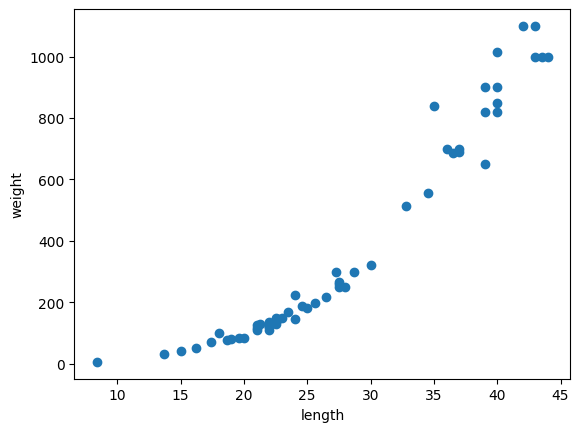

In [76]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train #원래는 매트릭스인데 데이터가 하나라 한줄짜리 벡터로 나옴 
X_train= X_train.reshape(-1,1) #2차원 매트릭스 나옴 (벡터를 매트릭스로)
X_test =X_test.reshape(-1,1)



In [78]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

knr.score(X_test, y_test)

#neighborsRegressor: K - 최근접 이웃알고리즘을 회귀 문제에 적용한 머신러닝 모델 , 새로운 데이터 포인트와 가장 가까운 K개의
#이웃을 찾아서 이웃들의 평균값을 예측값으로 사용하는 방식으로 작동. 


0.992809406101064

In [79]:
from sklearn.metrics import mean_absolute_error
test_prediction  = knr.predict(X_test)
mean_absolute_error(test_prediction, y_test)#예측무게 실제무게 

19.157142857142862

In [80]:
knr.score(X_train, y_train) #test 보다 train 점수가 높다고 한다. 

0.9698823289099254

- 과대 적합 (Overfitting)
- 훈련 세트 점수 >> 테스트 세트 점수 (테스트 점수에 써먹을려고 한건데 훈련세트에 너무 과대 적합해진다.)

- 과소 적합(Underfitting) 
    - 훈련 세트 점수 << 테스트세트 점수 
    -  그냥 점수가 낮음 


In [ ]:
# 과소 적합
knr.n_neighbors = 5

print(knr.score(X_train, y_train) - knr.score(X_test, y_test))

knr.n_neighbors = 3

print(knr.score(X_train, y_train) - knr.score(X_test, y_test))
#  

-0.022927077191138623
0.005843998653135674


# train_data 
* X_train: 모델이 보고 학습하는 입력 데이터 (feature)
* y_train: 모델이 예측해야 하는 정답 데이터 (target)

## KNN 회귀가 예측값을 만드는 법 


[1033.33333333]


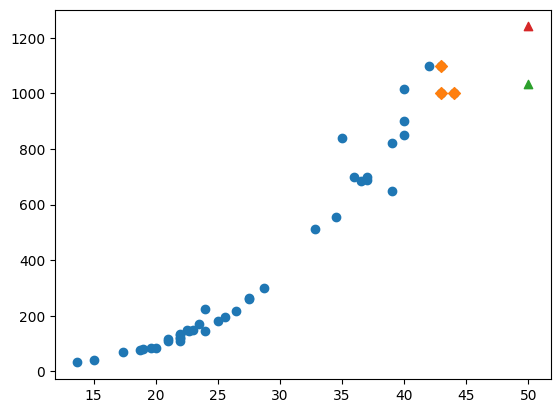

In [82]:

print(knr.predict([[100]]))
distances, indexes = knr.kneighbors([[100]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.scatter(50, 1241, marker='^') # 새로운 데이터 포인트 (50) 에 대한 예측값 (1241)을 어덯게 도출하는지
# 시각적으로 보여준다 . 
#파안원 : 모델이 학습한 훈련 데이터셋 
#마름모 : 가장 가까운 2개의 이웃을 찾아낸다. 이 두데이터 포인트의Y y값 평균이 새로운 데이터 포인틩 예측값임. 
# 초록색 삼각형: 50,1033 예측을 원하는 새로운 데이터 포인트
# 보라색: 삼각ㅎ형 50,1241 모델이 예측한 값 두이웃값의 평균임 

## 선형 회귀 (Linear Regression) 
- 독립 변수와 종속 변수 사이의 관계를 모델링 하는데 사용 
- 목표: 데이터에 가장 잘 맞는 직선 관계를 찾아냄 


In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
# 기울기, 절편
print(lr.coef_, lr.intercept_)
# 점수 -> train > test. but 둘다 낮아서 과소적합
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 길이 50의 무게 예측
lr.predict([[50]])


[39.01714496] -709.0186449535477
0.9398463339976041
0.8247503123313559


array([1241.83860323])

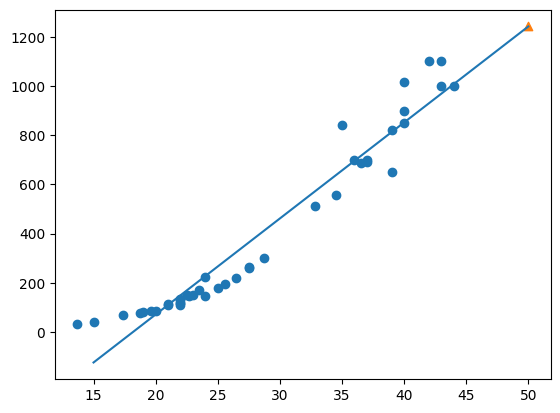

In [84]:
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_]) 
#(15,50)은 직선을 그릴 x축의 범위이며, 해당범위에 맞춰 계산된 y축 값이 직선을 완성한다. 
#최적의 예측 직선 
plt.scatter(50, 1241.8, marker='^') # 모델이 예측한 새로운 데이터 포인트 
plt.show()

### 다항 회귀 

In [93]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [94]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.coef_, lr.intercept_)

print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

lr.predict([[50**2, 50]])



[  1.01433211 -21.55792498] 116.05021078278247
0.9706807451768623
0.9775935108325121


array([1573.98423528])

In [ ]:
point = np.arange(15, 50)
plt.scatter(X_train, y_train)
plt.plot(point, 1.014*point**2 - 21.55*point + 116.05)
plt.scatter(50, 1573, marker='^')
plt.show()

* 다항회귀 = 변수는 하나지만, 제곱/세제곱 같은 다항식을 만들어서 비선형 관계를 표현
* 다중회귀 = 변수가 여러 개라서 다차원 직선으로 관계를 표현